In [23]:
import pandas as pd
import numpy as np

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager
mpl.rcParams.update(mpl.rcParamsDefault)

# import warnings
# warnings.filterwarnings("ignore")

divs = lambda x, y: np.divide(np.array([x], dtype=float), np.array([y], dtype=float), out=np.full_like(np.array([x], dtype=float), np.nan), where=np.array([y], dtype=float)!=0)


In [25]:
mss=120
fontssize=50
mpl.rcParams.update({
    'figure.figsize': (23.6,12.6),
    'font.family': 'serif',
    'font.serif': ['Liberation Sans'],  # Add or remove font names as needed
    'font.size': fontssize,  # Adjust as needed
    #'font.weight': 'bold',
    "svg.fonttype": 'none',
    'text.usetex': False,
    'axes.linewidth' : 2,
    'text.latex.preamble': r'\usepackage{amsmath} \usepackage{amsfonts} \usepackage{cmbright}',
    'xtick.labelsize' : fontssize, # fontsize of the x tick labels
    'ytick.labelsize' : fontssize # fontsize of the y tick labels
})
ticks_font = font_manager.FontProperties(family='Liberation Sans', style='normal',
    size=fontssize, weight='bold', stretch='normal')

In [26]:
rats=[20382,24101,21012,22295,20630,22098,23783,24116]
path="../data_bool/"
df = pd.DataFrame()
df = df.fillna(0)

for ratid in rats:
    tmp_df=pd.read_json(path+"Rat_"+str(ratid)+"_BOOLop_resrel_data.json")
    df = pd.concat([df,tmp_df], ignore_index=True)

In [ ]:
# path="../data_bool/"
# rat=24116
# df=pd.read_json(path+"Rat_"+str(rat)+"_BOOLop_resrel_data.json")
# df = df.fillna(0)
# rec_gids=df.Rec_GID.unique()

# # rgid=3162

In [28]:
df_AND=df.query('OP == "AND"')
df_OR=df.query('OP == "OR"')
df_XOR=df.iloc[df.query('OP == "OR"').index + 1 ] ##For XOR, the next row is the result
assert np.array_equal(df_OR.U1_GID.values,df_XOR.U1_GID.values)
assert np.array_equal(df_OR.U2_GID.values,df_XOR.U2_GID.values)

# MSR -- Individual Figures of the subplot for all recordings combined

In [29]:
quant='MSR'

#qmin=0.245;qmax=0.305; #For MSR
qmin=0.245;qmax=0.31; #For MSR

#MSR
#xqmax=0.31;xqmin=0.25;
yqmax=0.32;yqmin=-0.01;


## Single recording
# qmin=0.245;qmax=0.305; #For MSR

# #MSR
# xqmax=0.31;xqmin=0.25;
# yqmax=0.32;yqmin=-0.02;



In [30]:
quant_OR_vals={unit : df.query('U1_GID=='+str(unit)+' and OP=="NA"')[quant].values[0] for unit in np.unique(np.hstack((df_OR.U1_GID.values,df_OR.U2_GID.values)))}
quant_AND_vals={unit : df.query('U1_GID=='+str(unit)+' and OP=="NA"')[quant].values[0] for unit in np.unique(np.hstack((df_AND.U1_GID.values,df_AND.U2_GID.values)))}

OR_list=[]
for (a,b) in df_OR[[quant,"U1_GID","U2_GID","Nspikes","U_LOC","Rec_GID"]].iterrows():
    row={quant:b.values[0],
            'U1_GID':b.values[1],
            'U2_GID':b.values[2],
            'U1_'+quant:quant_OR_vals[b.values[1]],
            'U2_'+quant:quant_OR_vals[b.values[2]],
            'R_'+quant+'_MAX':np.max([quant_OR_vals[b.values[1]],quant_OR_vals[b.values[2]]]),
            'Nspike':b.values[3],
            'loc':b.values[4],
            'Rec_GID':b.values[5]
          };
    OR_list.append(row)
list_of_OR=pd.DataFrame(OR_list)

AND_list=[]
for (a,b) in df_AND[[quant,"U1_GID","U2_GID","Nspikes","U_LOC","Rec_GID"]].iterrows():
    row={quant:b.values[0],
            'U1_GID':b.values[1],
            'U2_GID':b.values[2],
            'U1_'+quant:quant_AND_vals[b.values[1]],
            'U2_'+quant:quant_AND_vals[b.values[2]],
            'R_'+quant+'_MAX':np.max([quant_AND_vals[b.values[1]],quant_AND_vals[b.values[2]]]),
            'Nspike':b.values[3],
            'loc':b.values[4],
            'Rec_GID':b.values[5]
          };
    AND_list.append(row)
list_of_AND=pd.DataFrame(AND_list)
#list_of_AND[quant] = list_of_AND[quant].replace(0, np.nan)

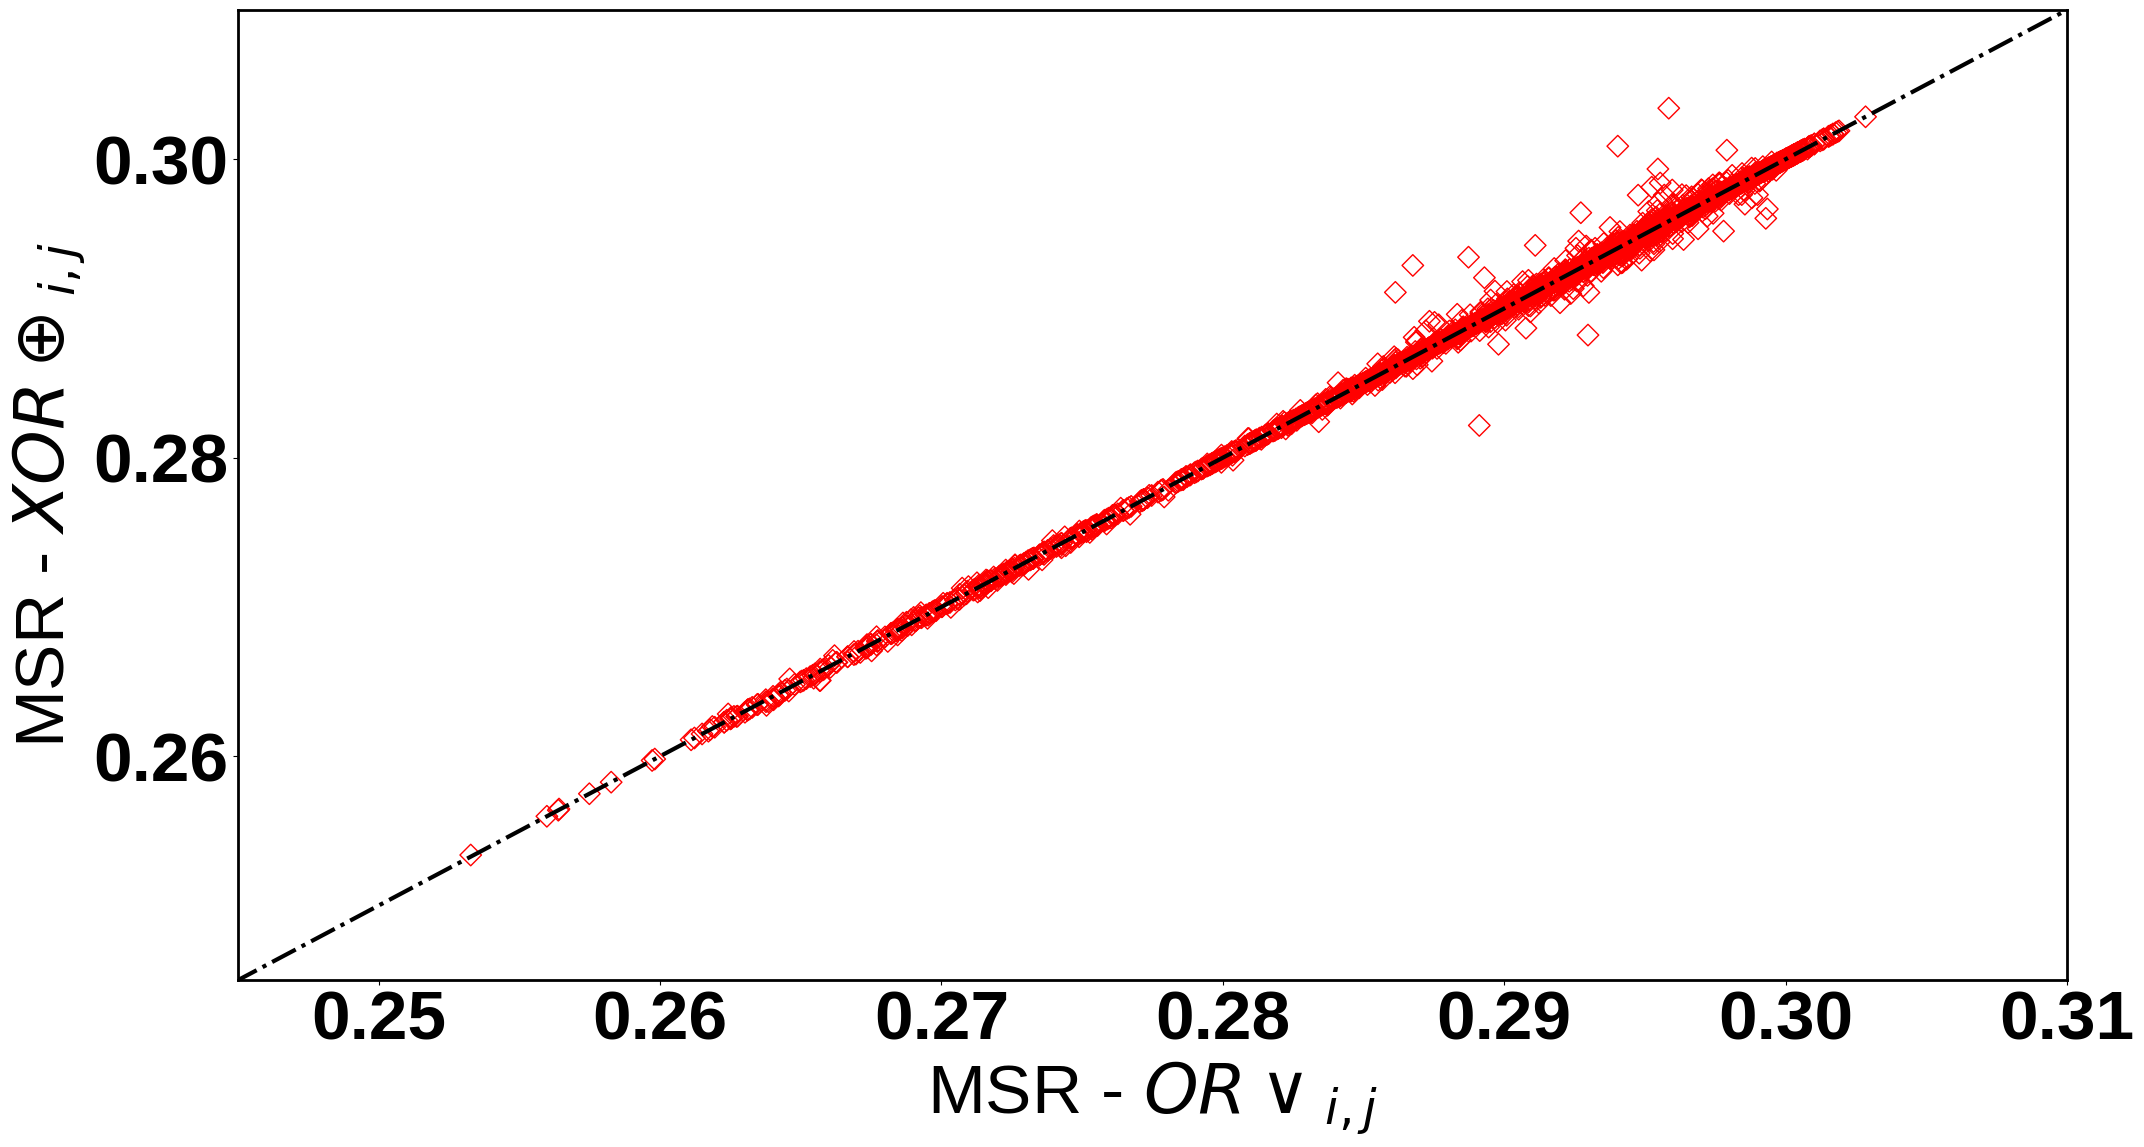

In [31]:
fig, ax1 = plt.subplots()
figname='../figures/CA1_MSR_ORvXOR.pdf'

ax1.scatter(df_OR.query('U_LOC=="CA1"')[quant].values,df_XOR.query('U_LOC=="CA1"')[quant].values, label='CA1 Neurons', marker='D', facecolors='none',edgecolors='r',s=mss)

ax1.plot([0, qmax], [0, qmax],color="k",ls="-.", lw=3) ## Diagonal Line

ax1.set_xlim([qmin,qmax]);ax1.set_ylim([qmin,qmax])
# ax1.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False, labelbottom=False,labelleft=True,rotation=0)

ax1.set_xlabel(quant+r' - $OR\vee_{i,j}$');
ax1.set_ylabel(quant+r' - $XOR\oplus_{i,j}$');

for tick in ax1.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax1.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

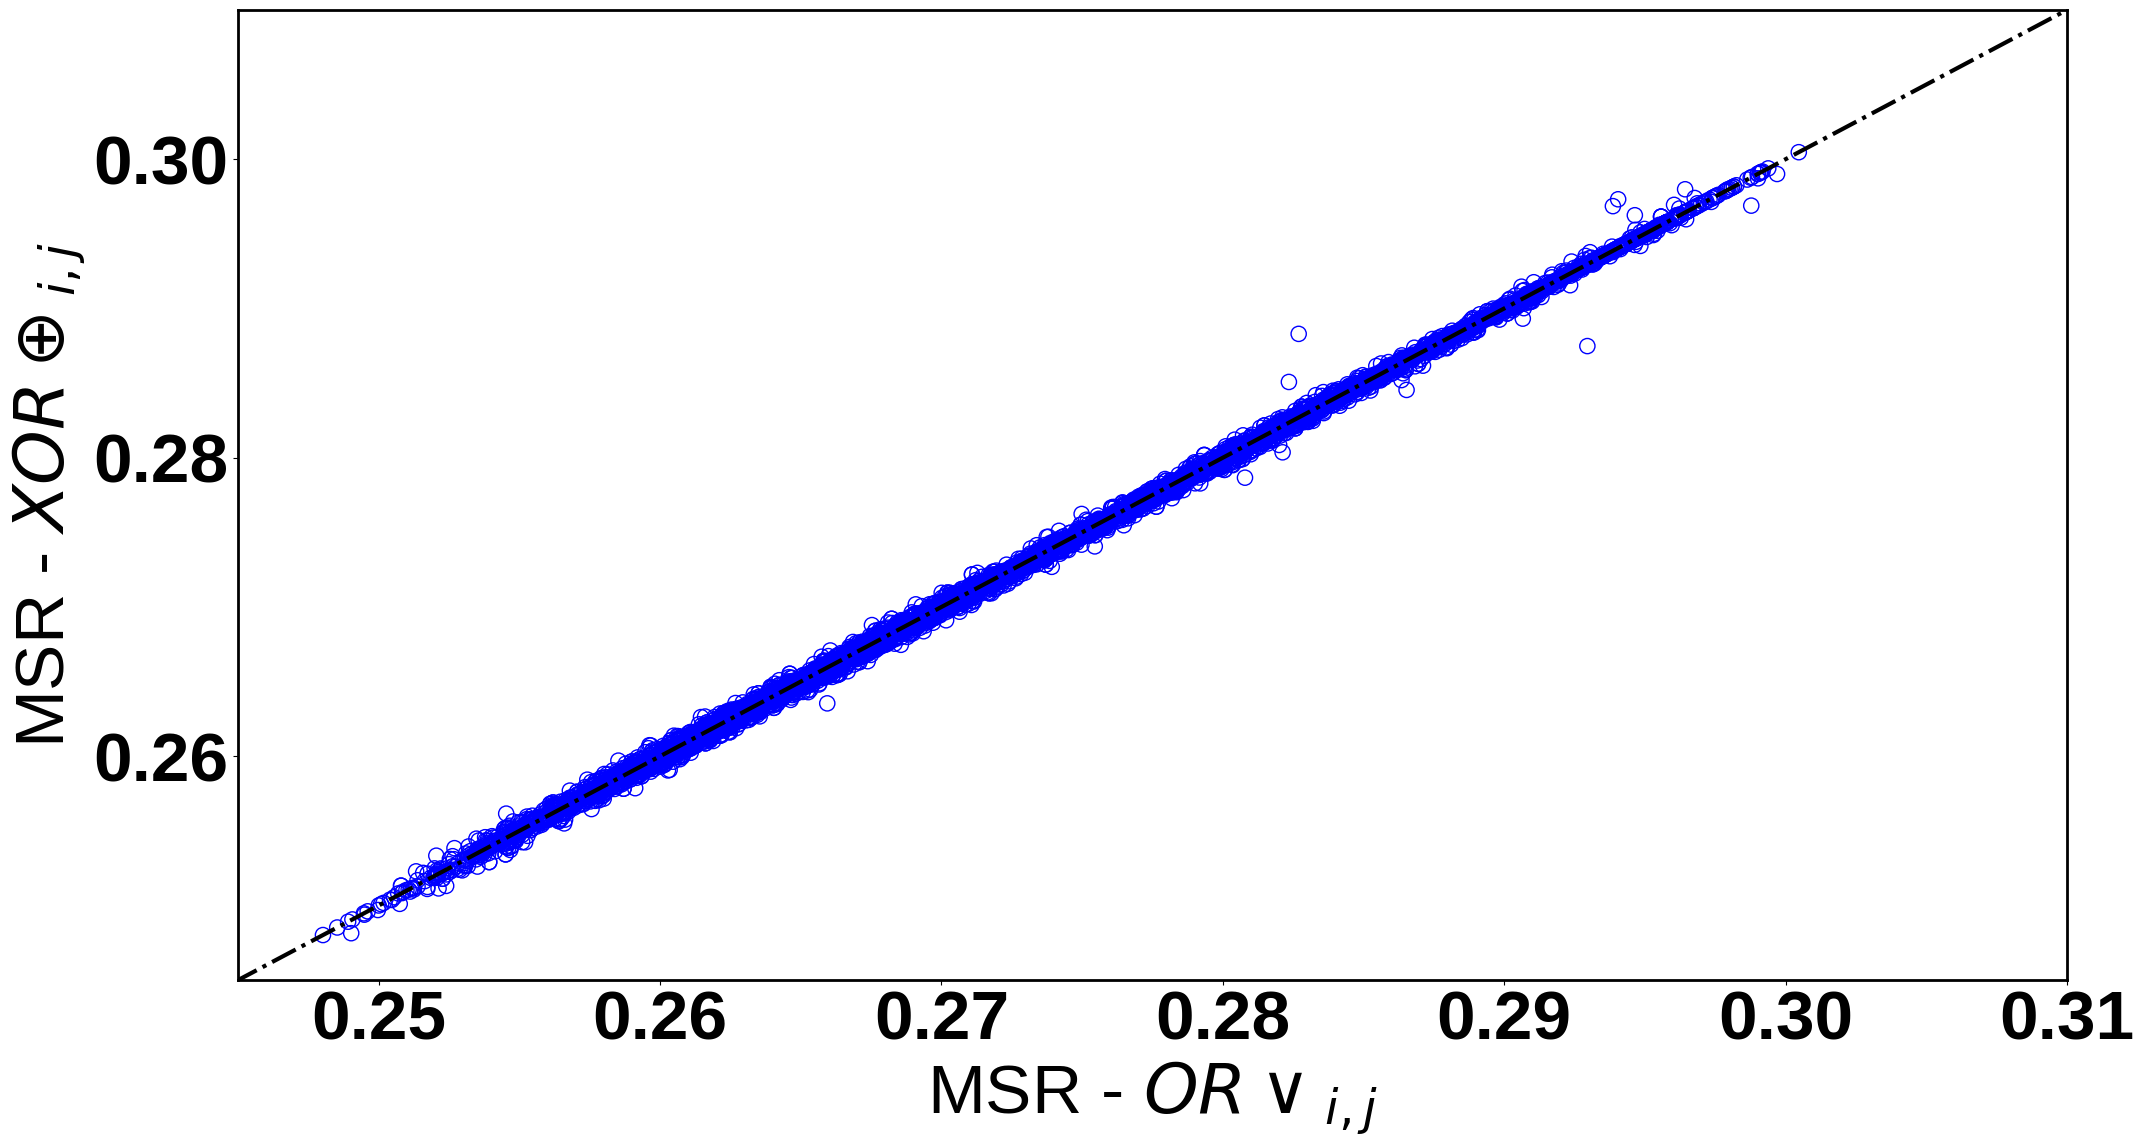

In [32]:
fig, ax1 = plt.subplots()
figname='../figures/SUB_MSR_ORvXOR.pdf'

ax1.scatter(df_OR.query('U_LOC=="SUB"')[quant].values,df_XOR.query('U_LOC=="SUB"')[quant].values,
         label='SUB Neurons', marker='o', facecolors='none',edgecolors='b',s=mss)

ax1.plot([0, qmax], [0, qmax],color="k",ls="-.", lw=3) ## Diagonal Line
ax1.set_xlim([qmin,qmax]);ax1.set_ylim([qmin,qmax])

# ax3.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False, labelbottom=True,labelleft=True,rotation=0)

ax1.set_xlabel(quant+r' - $OR\vee_{i,j}$');
ax1.set_ylabel(quant+r' - $XOR\oplus_{i,j}$');

for tick in ax1.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax1.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

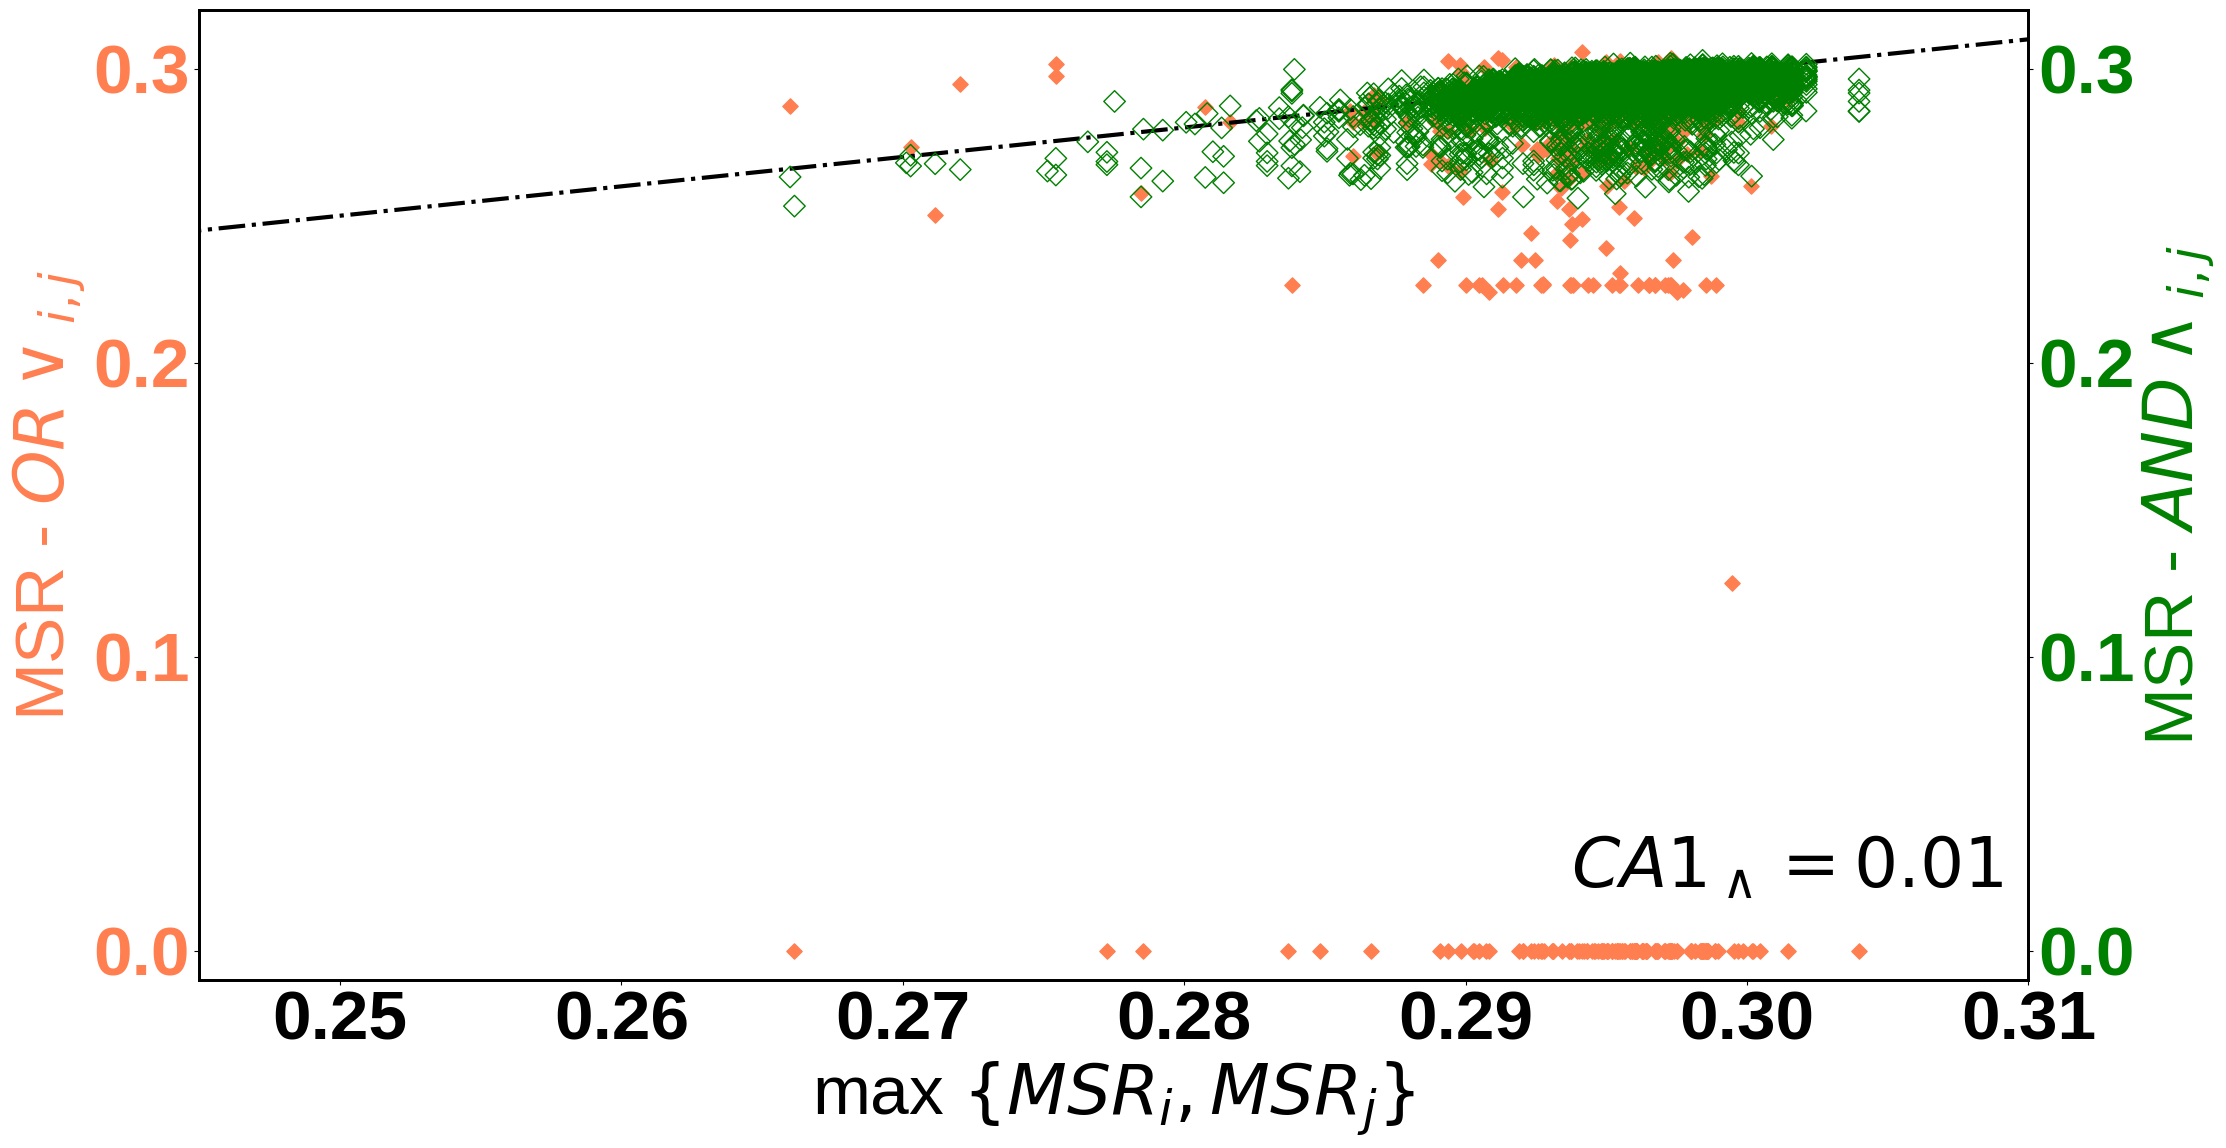

In [33]:
fig, ax = plt.subplots()
figname='../figures/CA1_MSR_maxMvANDOR.pdf'


ax.plot([0, yqmax], [0, yqmax],color="k",ls="-.", lw=3) ## Diagonal Line#

clr='coral'
ax.set_xlim([qmin,qmax]);ax.set_ylim([yqmin,yqmax]);
for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(ticks_font)
ax.set_xlabel(r'max $\{'+quant+r'_i,'+quant+r'_j\}$');
ax.set_ylabel(quant+r' - $OR\vee_{i,j}$');
ax.scatter(list_of_AND.query('loc=="CA1"')["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="CA1"')[quant].values,
         label='ANDed CA1 Neurons', marker='D', color=clr,s=mss/2)
ax.tick_params(axis='y',labelcolor=clr)
ax.yaxis.label.set_color(clr)


ax_twin = ax.twinx()
clr='green'
ax_twin.set_ylabel(quant+r' - $AND\wedge_{i,j}$');
for tick in ax_twin.get_yticklabels():
    tick.set_fontproperties(ticks_font)
ax_twin.scatter(list_of_OR.query('loc=="CA1"')["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="CA1"')[quant].values,
         label='ORed CA1 Neurons', marker='D', facecolors='none',edgecolors=clr,s=mss)
ax_twin.tick_params(axis='y', labelcolor=clr)
ax_twin.yaxis.label.set_color(clr)
ax_twin.set_ylim([yqmin,yqmax]);


## Activate if plotting for single recording of a rat
# fracC=np.round(divs(list_of_AND.query('loc=="CA1" and MSR>R_MSR_MAX and Rec_GID =='+str(rgid)).shape[0],list_of_AND.query('loc=="CA1" and Rec_GID =='+str(rgid)).shape[0]),2)

## Activate if plotting for all recording 
fracC=np.round(list_of_AND.query('loc=="CA1" and MSR>R_MSR_MAX').shape[0]/list_of_AND.query('loc=="CA1"').shape[0],2)

ax.text(0.75, 0.15,   r'$CA1_\wedge = %.2f$' % (fracC),
         transform=ax.transAxes, fontsize=fontssize, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5, linewidth=0))


fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

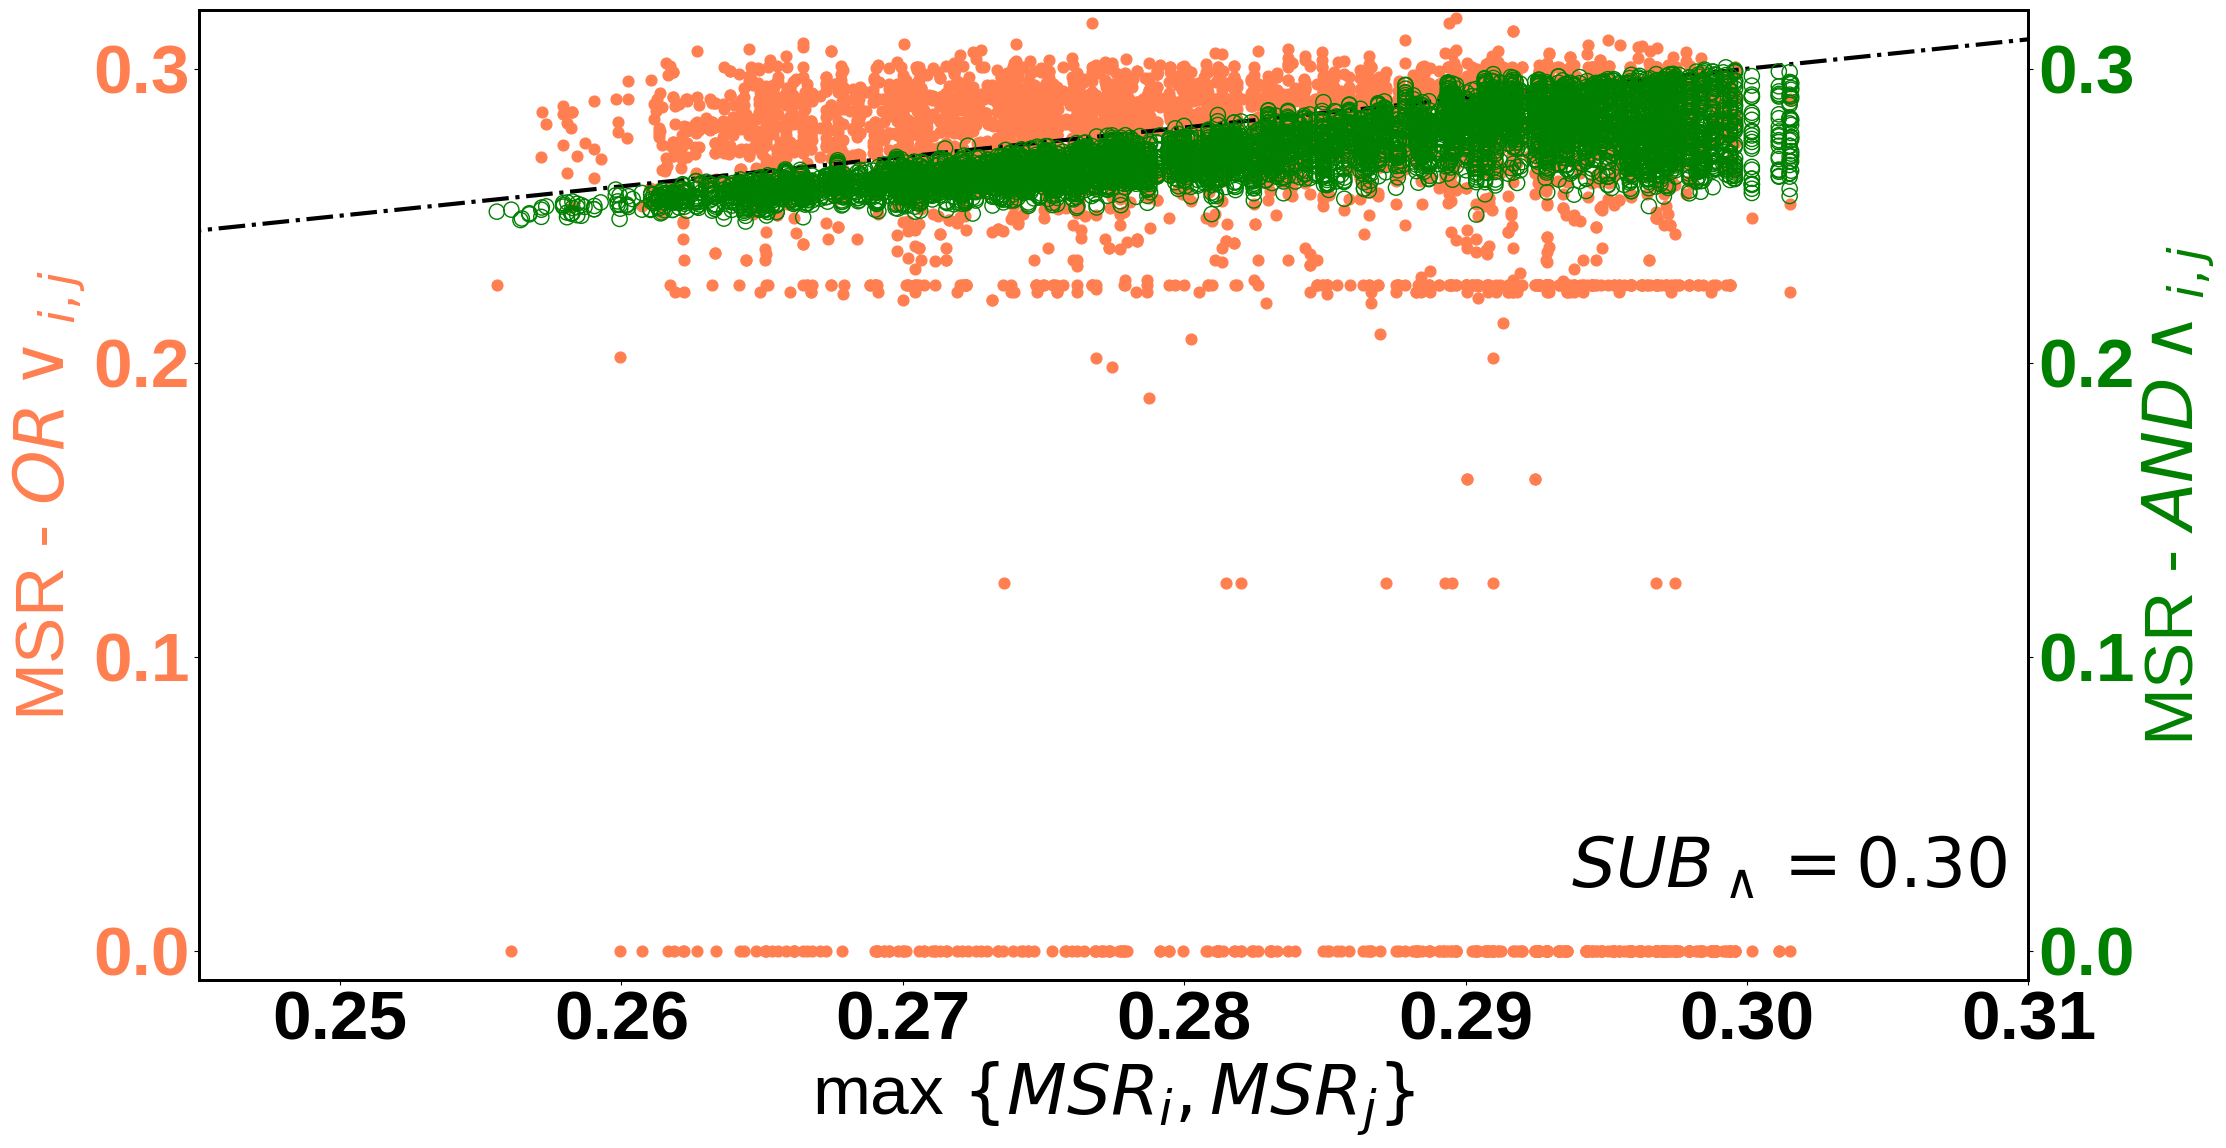

In [34]:
fig, ax = plt.subplots()
figname='../figures/SUB_MSR_maxMvANDOR.pdf'

ax.plot([0, yqmax], [0, yqmax],color="k",ls="-.", lw=3) ## Diagonal Line#

clr='coral'
ax.set_xlim([qmin,qmax]);ax.set_ylim([yqmin,yqmax]);
for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
ax.set_xlabel(r'max $\{'+quant+r'_i,'+quant+r'_j\}$');
ax.set_ylabel(quant+r' - $OR\vee_{i,j}$');

ax.scatter(list_of_AND.query('loc=="SUB"')["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="SUB"')[quant].values,
         label='ANDed SUB Neurons', marker='o', color=clr,s=mss/2)
ax.tick_params(axis='y',labelcolor=clr)
ax.yaxis.label.set_color(clr)


ax_twin = ax.twinx()
clr='green'
ax_twin.set_ylabel(quant+r' - $AND\wedge_{i,j}$');
for tick in ax_twin.get_yticklabels():
    tick.set_fontproperties(ticks_font)
ax_twin.scatter(list_of_OR.query('loc=="SUB"')["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="SUB"')[quant].values,
         label='ORed SUB Neurons', marker='o', facecolors='none',edgecolors=clr,s=mss)
ax_twin.tick_params(axis='y', labelcolor=clr)
ax_twin.yaxis.label.set_color(clr)
ax_twin.set_ylim([yqmin,yqmax]);


## Activate if plotting for single recording of a rat
# fracS=np.round(divs(list_of_AND.query('loc=="SUB" and MSR>R_MSR_MAX and Rec_GID =='+str(rgid)).shape[0],list_of_AND.query('loc=="SUB" and Rec_GID =='+str(rgid)).shape[0]),2)

## Activate if plotting for all recording 
fracS=np.round(list_of_AND.query('loc=="SUB" and MSR>R_MSR_MAX').shape[0]/list_of_AND.query('loc=="SUB"').shape[0],2)

ax.text(0.75, 0.15,   r'$SUB_\wedge = %.2f$' % (fracS),
         transform=ax.transAxes, fontsize=fontssize, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5, linewidth=0))



fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

# OHK -- Individual Figures of the subplot for all recordings combined

In [35]:
quant='OHK'

#For OHK
qmin=0.1;qmax=0.6; 

##OHK
#xqmax=0.6;xqmin=0.1;
yqmax=0.6;yqmin=0.1;

## Single recording
# #qmin=0.1;qmax=0.5;  #For OHK

# #OHK
# # xqmax=0.6;xqmin=0.1;
# # yqmax=0.6;yqmin=0.1;


In [36]:
quant_OR_vals={unit : df.query('U1_GID=='+str(unit)+' and OP=="NA"')[quant].values[0] for unit in np.unique(np.hstack((df_OR.U1_GID.values,df_OR.U2_GID.values)))}
quant_AND_vals={unit : df.query('U1_GID=='+str(unit)+' and OP=="NA"')[quant].values[0] for unit in np.unique(np.hstack((df_AND.U1_GID.values,df_AND.U2_GID.values)))}

OR_list=[]
for (a,b) in df_OR[[quant,"U1_GID","U2_GID","Nspikes","U_LOC","Rec_GID"]].iterrows():
    row={quant:b.values[0],
            'U1_GID':b.values[1],
            'U2_GID':b.values[2],
            'U1_'+quant:quant_OR_vals[b.values[1]],
            'U2_'+quant:quant_OR_vals[b.values[2]],
            'R_'+quant+'_MAX':np.max([quant_OR_vals[b.values[1]],quant_OR_vals[b.values[2]]]),
            'Nspike':b.values[3],
            'loc':b.values[4],
            'Rec_GID':b.values[5]
          };
    OR_list.append(row)
list_of_OR=pd.DataFrame(OR_list)

AND_list=[]
for (a,b) in df_AND[[quant,"U1_GID","U2_GID","Nspikes","U_LOC","Rec_GID"]].iterrows():
    row={quant:b.values[0],
            'U1_GID':b.values[1],
            'U2_GID':b.values[2],
            'U1_'+quant:quant_AND_vals[b.values[1]],
            'U2_'+quant:quant_AND_vals[b.values[2]],
            'R_'+quant+'_MAX':np.max([quant_AND_vals[b.values[1]],quant_AND_vals[b.values[2]]]),
            'Nspike':b.values[3],
            'loc':b.values[4],
            'Rec_GID':b.values[5]
          };
    AND_list.append(row)
list_of_AND=pd.DataFrame(AND_list)
#list_of_AND[quant] = list_of_AND[quant].replace(0, np.nan)

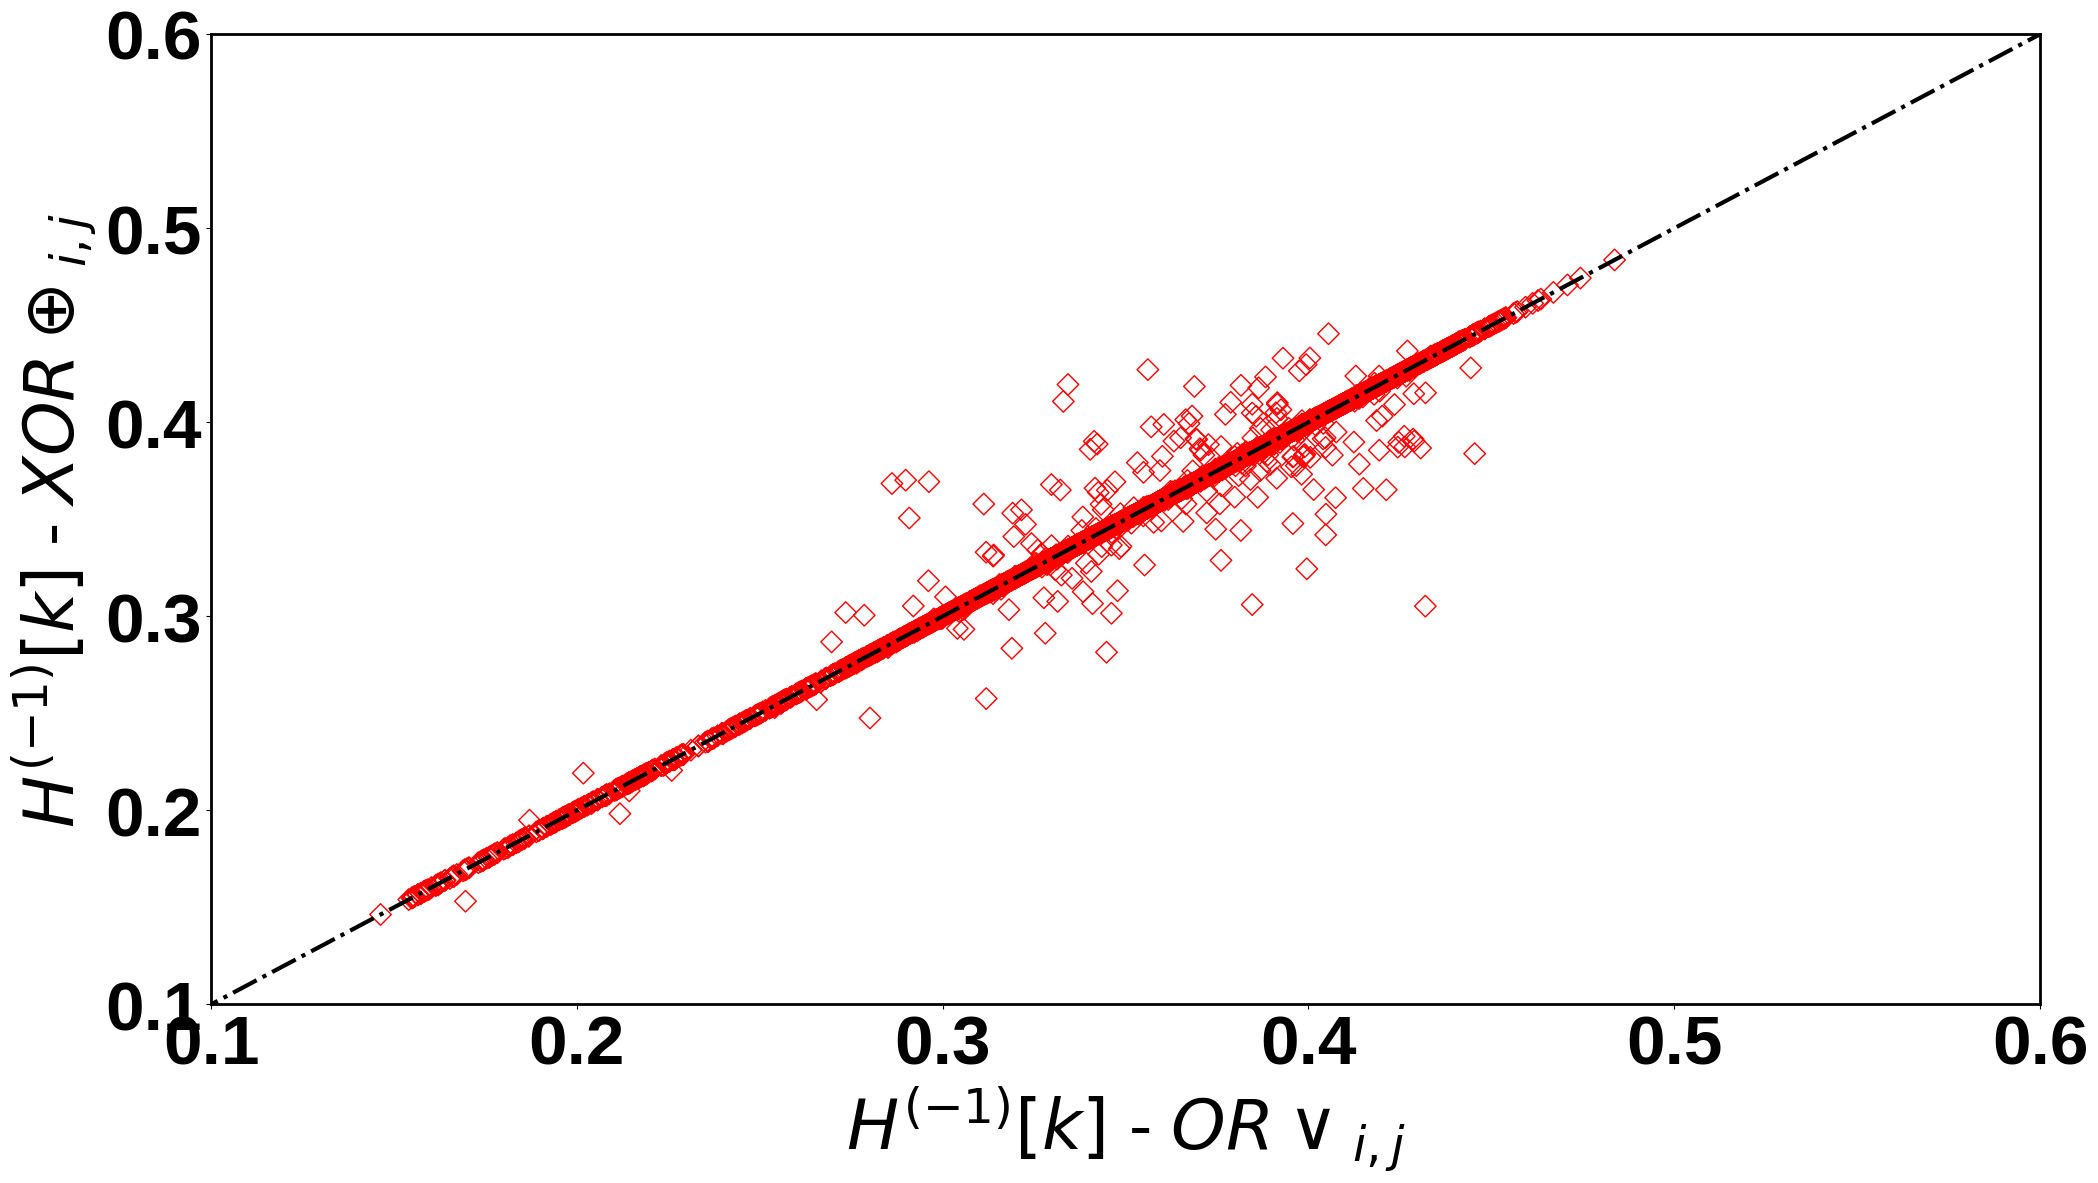

In [37]:
fig, ax1 = plt.subplots()
figname='../figures/CA1_OHK_ORvXOR.pdf'

ax1.scatter(df_OR.query('U_LOC=="CA1"')[quant].values,df_XOR.query('U_LOC=="CA1"')[quant].values, label='CA1 Neurons', marker='D', facecolors='none',edgecolors='r',s=mss)

ax1.plot([0, qmax], [0, qmax],color="k",ls="-.", lw=3) ## Diagonal Line

ax1.set_xlim([qmin,qmax]);ax1.set_ylim([qmin,qmax])
# ax1.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False, labelbottom=False,labelleft=True,rotation=0)

ax1.set_xlabel(r'$H^{(-1)}[k]$ - $OR\vee_{i,j}$');
ax1.set_ylabel(r'$H^{(-1)}[k]$ - $XOR\oplus_{i,j}$');

for tick in ax1.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax1.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

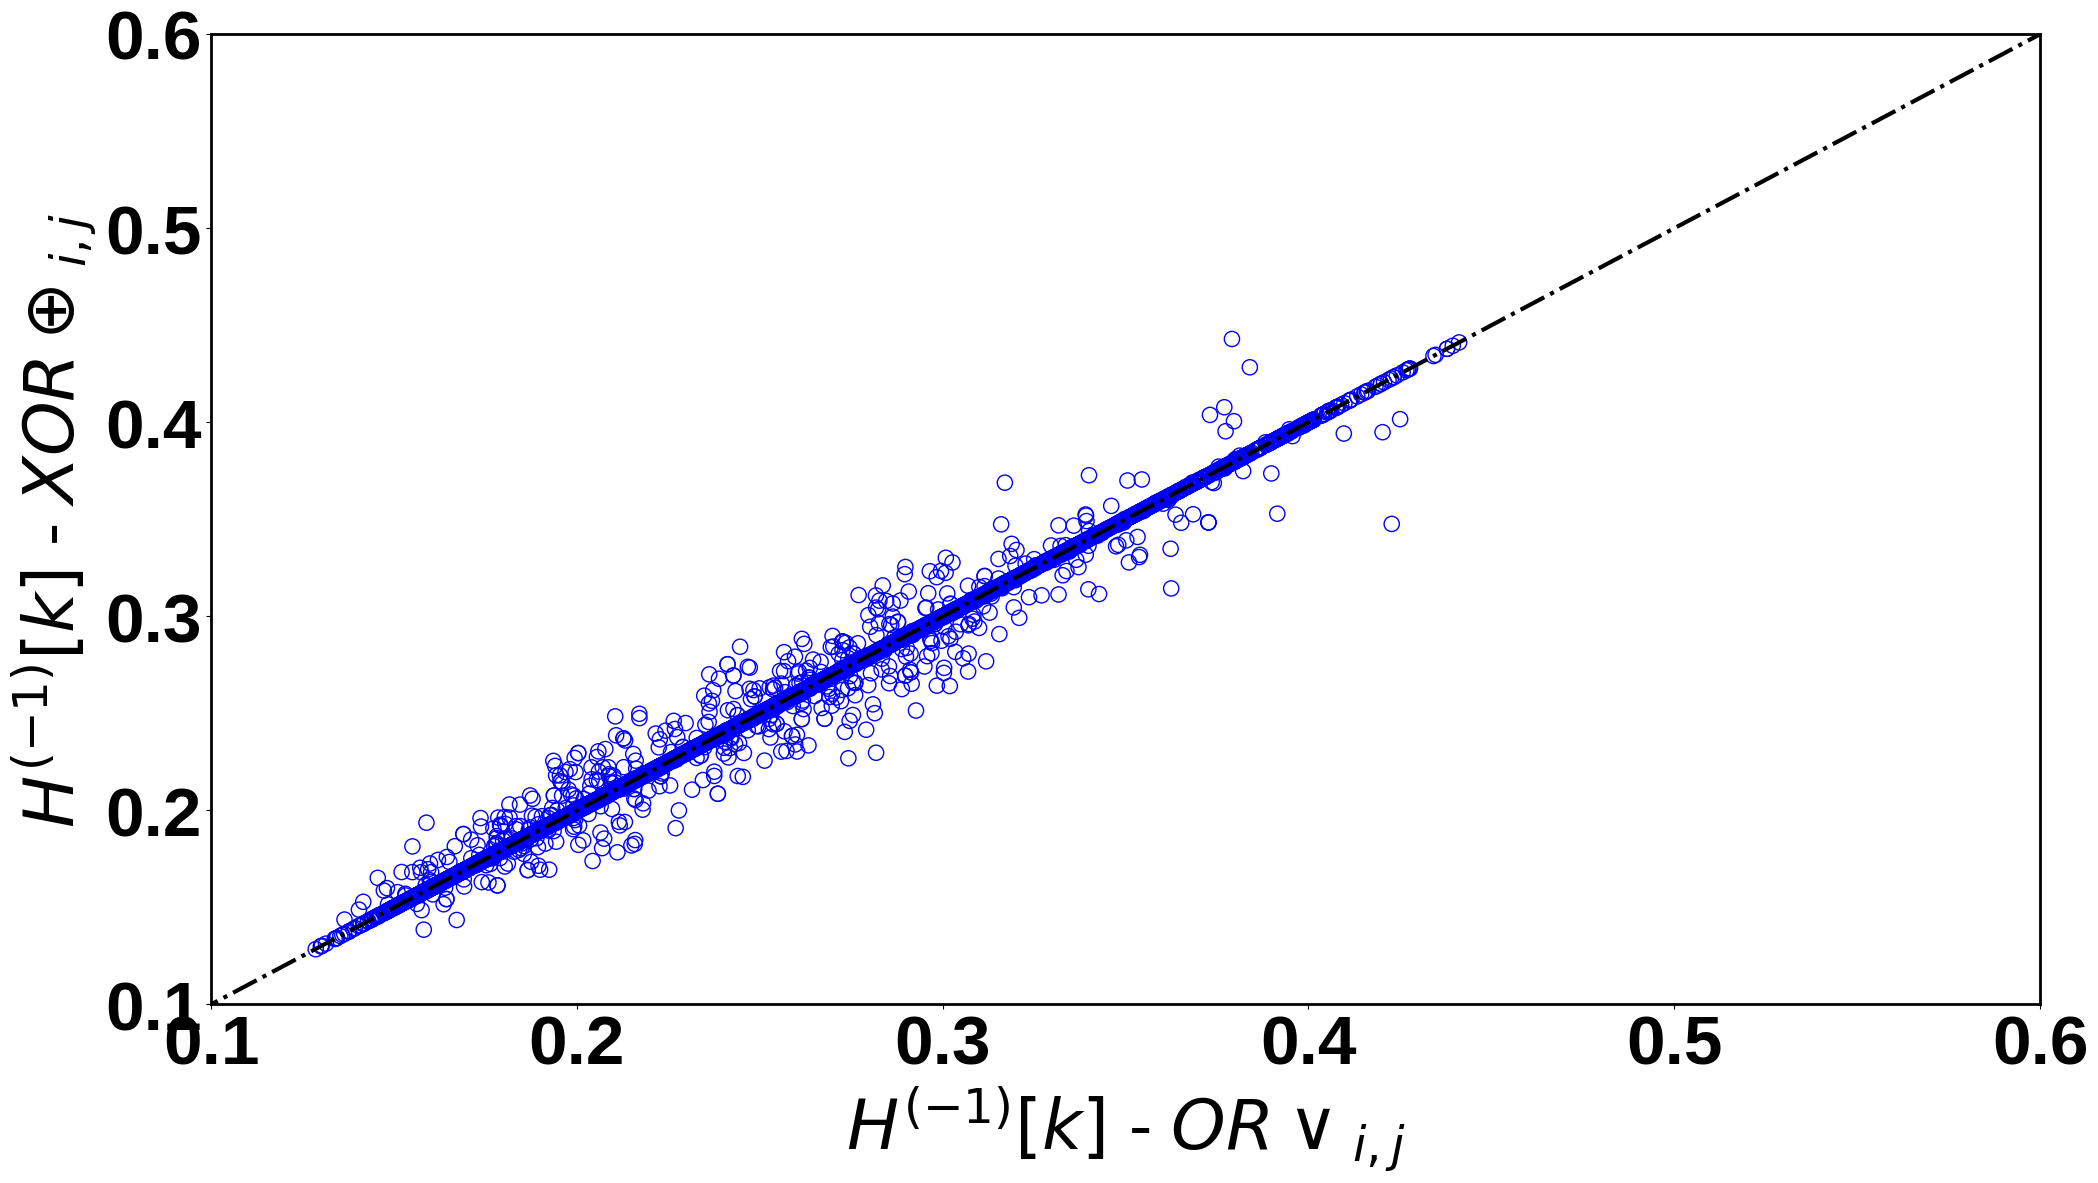

In [38]:
fig, ax1 = plt.subplots()
figname='../figures/SUB_OHK_ORvXOR.pdf'

ax1.scatter(df_OR.query('U_LOC=="SUB"')[quant].values,df_XOR.query('U_LOC=="SUB"')[quant].values,
         label='SUB Neurons', marker='o', facecolors='none',edgecolors='b',s=mss)

ax1.plot([0, qmax], [0, qmax],color="k",ls="-.", lw=3) ## Diagonal Line
ax1.set_xlim([qmin,qmax]);ax1.set_ylim([qmin,qmax])

# ax3.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False, labelbottom=True,labelleft=True,rotation=0)

ax1.set_xlabel(r'$H^{(-1)}[k]$ - $OR\vee_{i,j}$');
ax1.set_ylabel(r'$H^{(-1)}[k]$ - $XOR\oplus_{i,j}$');

for tick in ax1.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax1.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

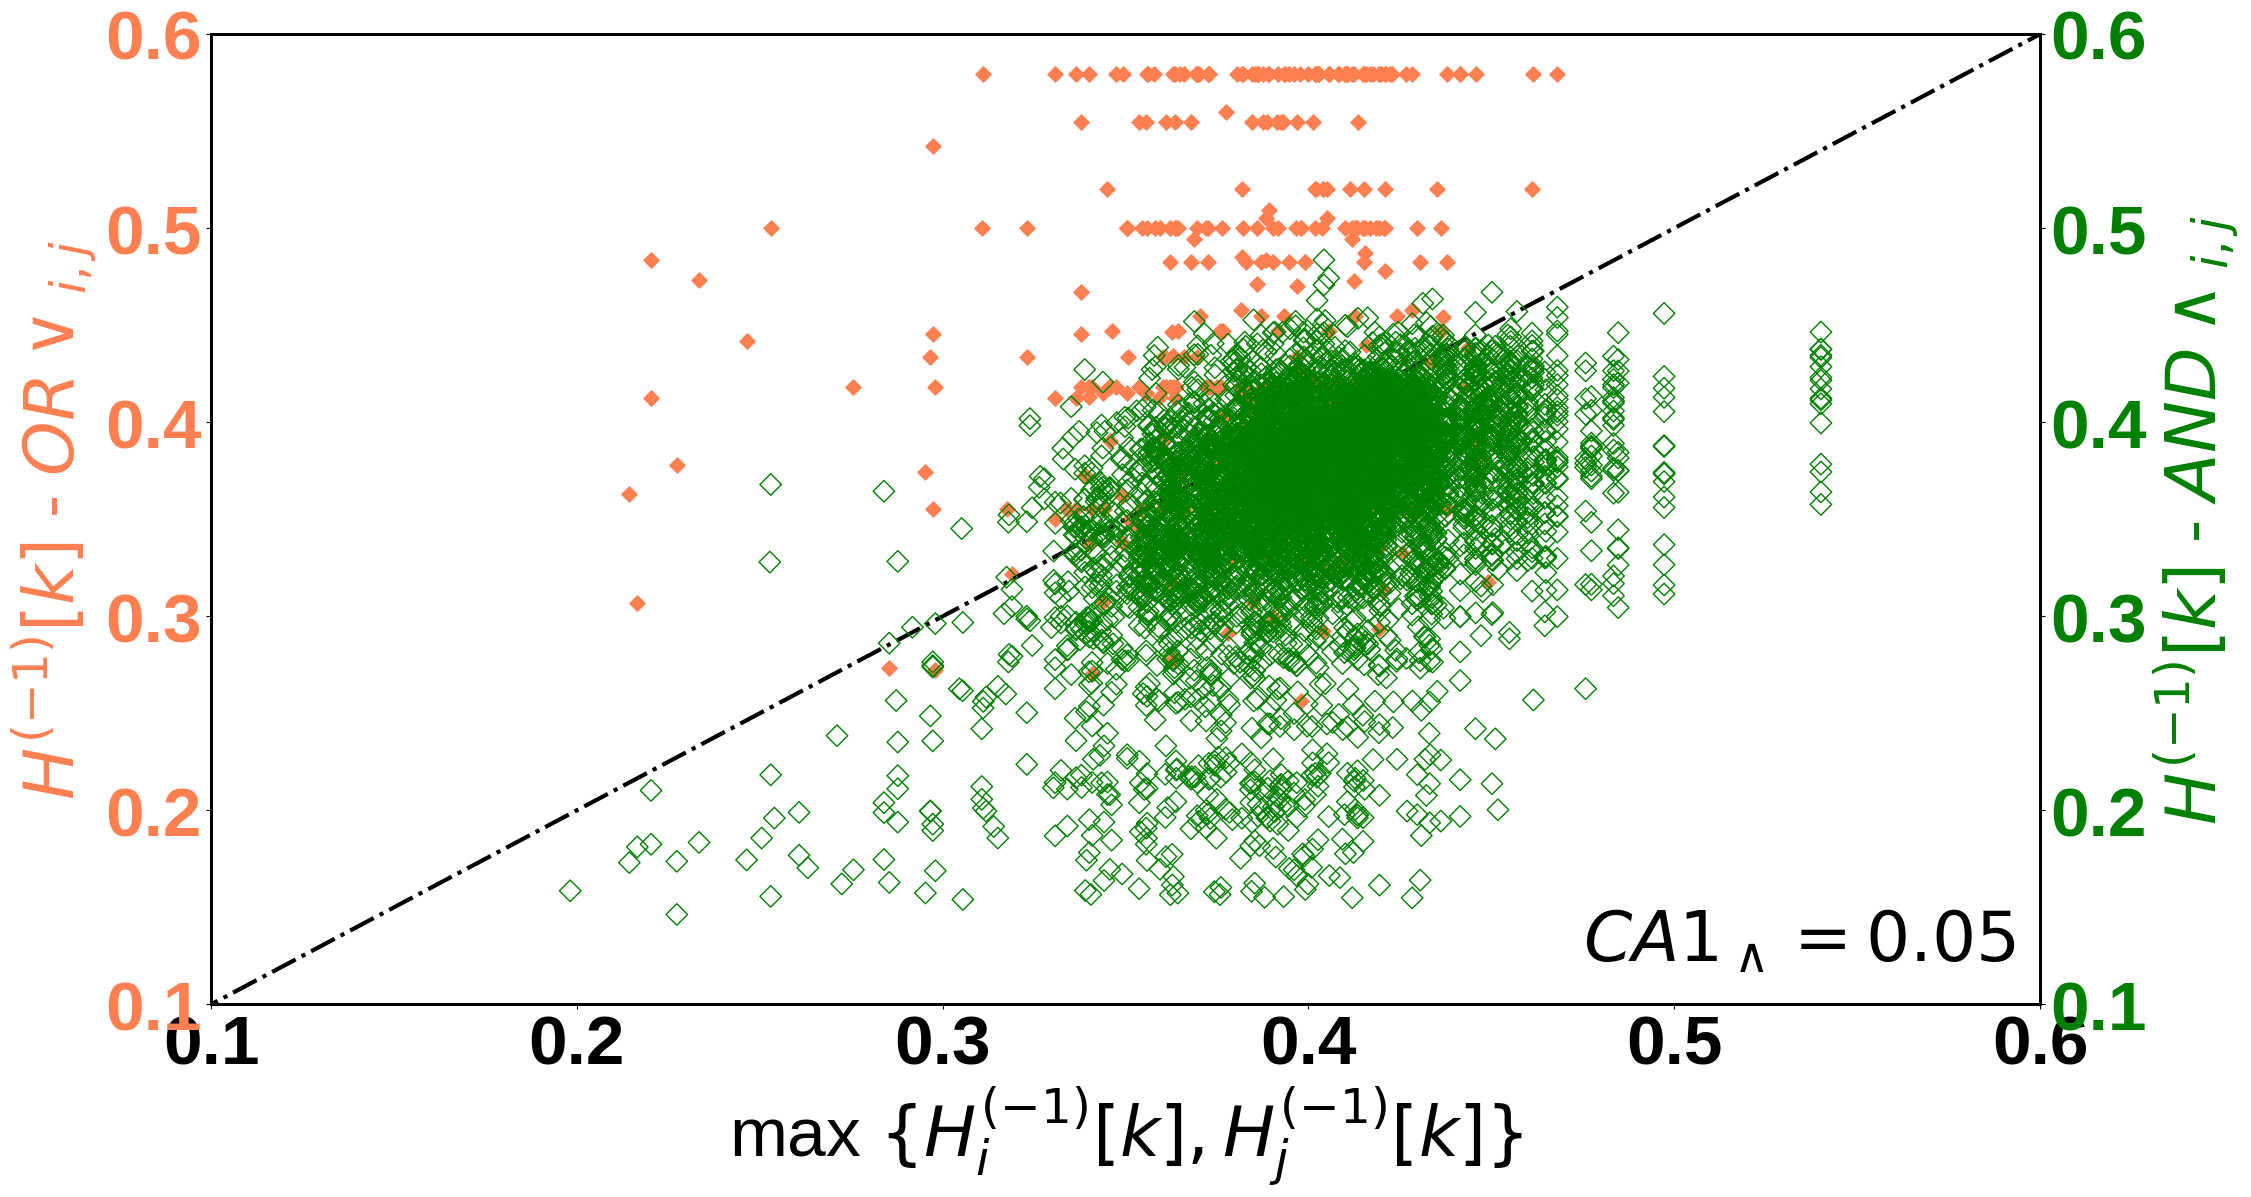

In [39]:
fig, ax = plt.subplots()
figname='../figures/CA1_OHK_maxMvANDOR.pdf'


ax.plot([0, yqmax], [0, yqmax],color="k",ls="-.", lw=3) ## Diagonal Line#

clr='coral'
ax.set_xlim([qmin,qmax]);ax.set_ylim([yqmin,yqmax]);
for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(ticks_font)

ax.set_xlabel(r'max $\{ H^{(-1)}_i[k] , H^{(-1)}_j[k] \}$');
ax.set_ylabel(r'$H^{(-1)}[k]$ - $OR\vee_{i,j}$');

ax.scatter(list_of_AND.query('loc=="CA1"')["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="CA1"')[quant].values,
         label='ANDed CA1 Neurons', marker='D', color=clr,s=mss/2)
ax.tick_params(axis='y',labelcolor=clr)
ax.yaxis.label.set_color(clr)


ax_twin = ax.twinx()
clr='green'

ax_twin.set_ylabel(r'$H^{(-1)}[k]$ - $AND\wedge_{i,j}$');

for tick in ax_twin.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
ax_twin.scatter(list_of_OR.query('loc=="CA1"')["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="CA1"')[quant].values,
         label='ORed CA1 Neurons', marker='D', facecolors='none',edgecolors=clr,s=mss)
         
ax_twin.tick_params(axis='y', labelcolor=clr)
ax_twin.yaxis.label.set_color(clr)
ax_twin.set_ylim([yqmin,yqmax]);


## Activate if plotting for single recording of a rat
# fracC=np.round(divs(list_of_AND.query('loc=="CA1" and OHK>R_OHK_MAX and Rec_GID =='+str(rgid)).shape[0],list_of_AND.query('loc=="CA1" and Rec_GID =='+str(rgid)).shape[0]),2)

## Activate if plotting for all recording 
fracC=np.round(list_of_AND.query('loc=="CA1" and OHK>R_OHK_MAX').shape[0]/list_of_AND.query('loc=="CA1"').shape[0],2)

ax.text(0.75, 0.15,   r'$CA1_\wedge = %.2f$' % (fracC),
         transform=ax.transAxes, fontsize=fontssize, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5, linewidth=0))


fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

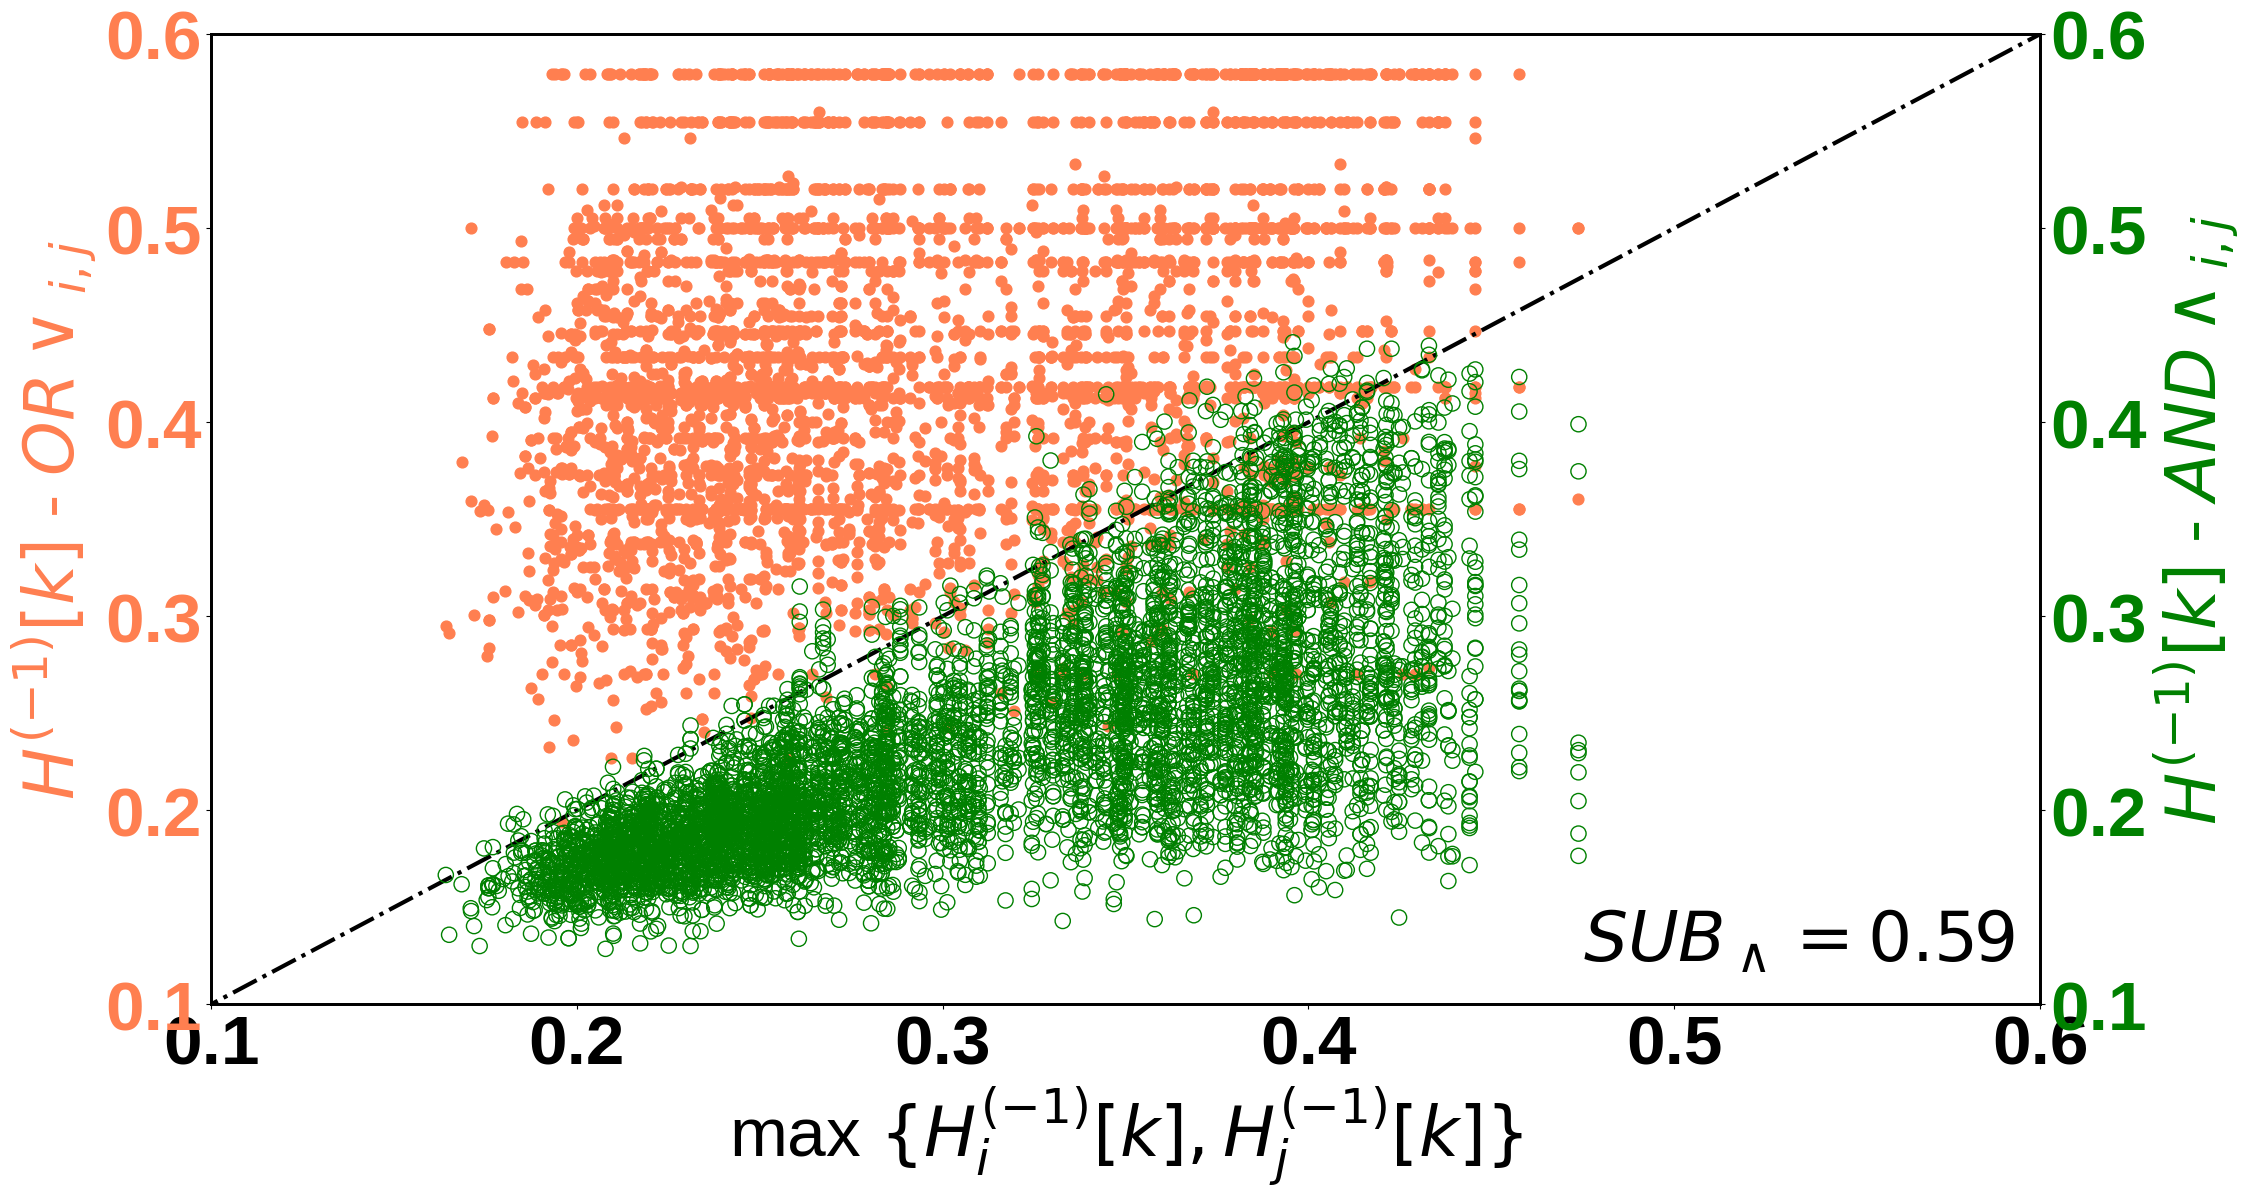

In [40]:
fig, ax = plt.subplots()
figname='../figures/SUB_OHK_maxMvANDOR.pdf'

ax.plot([0, yqmax], [0, yqmax],color="k",ls="-.", lw=3) ## Diagonal Line#

clr='coral'
ax.set_xlim([qmin,qmax]);ax.set_ylim([yqmin,yqmax]);
for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
ax.set_xlabel(r'max $\{ H^{(-1)}_i[k] , H^{(-1)}_j[k] \}$');
ax.set_ylabel(r'$H^{(-1)}[k]$ - $OR\vee_{i,j}$');

ax.scatter(list_of_AND.query('loc=="SUB"')["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="SUB"')[quant].values,
         label='ANDed SUB Neurons', marker='o', color=clr,s=mss/2)
ax.tick_params(axis='y',labelcolor=clr)
ax.yaxis.label.set_color(clr)


ax_twin = ax.twinx()
clr='green'
ax_twin.set_ylabel(r'$H^{(-1)}[k]$ - $AND\wedge_{i,j}$');
for tick in ax_twin.get_yticklabels():
    tick.set_fontproperties(ticks_font)
ax_twin.scatter(list_of_OR.query('loc=="SUB"')["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="SUB"')[quant].values,
         label='ORed SUB Neurons', marker='o', facecolors='none',edgecolors=clr,s=mss)
ax_twin.tick_params(axis='y', labelcolor=clr)
ax_twin.yaxis.label.set_color(clr)
ax_twin.set_ylim([yqmin,yqmax]);


## Activate if plotting for single recording of a rat
# fracS=np.round(divs(list_of_AND.query('loc=="SUB" and OHK>R_OHK_MAX and Rec_GID =='+str(rgid)).shape[0],list_of_AND.query('loc=="SUB" and Rec_GID =='+str(rgid)).shape[0]),2)

## Activate if plotting for all recording 
fracS=np.round(list_of_AND.query('loc=="SUB" and OHK>R_OHK_MAX').shape[0]/list_of_AND.query('loc=="SUB"').shape[0],2)

ax.text(0.75, 0.15,   r'$SUB_\wedge = %.2f$' % (fracS),
         transform=ax.transAxes, fontsize=fontssize, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5, linewidth=0))



fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

## Code for Plots not included in the Manuscript

Plotting for Single Recordings for all Rats

In [ ]:
rats=[20382,24101,21012,22295,20630,22098,23783,24116]
path="../data_bool/"
 
rat=24116
df=pd.read_json(path+"Rat_"+str(rat)+"_BOOLop_resrel_data.json")
df = df.fillna(0)
rec_gids=df.Rec_GID.unique()

rgid=3162

In [ ]:
quant='MSR'
# quant='OHK'

#For MSR
qmin=0.245;qmax=0.31; #For MSR
#For OHK
qmin=0.1;qmax=0.6; 

##OHK
#xqmax=0.6;xqmin=0.1;
yqmax=0.6;yqmin=0.1;

## Single recording
# qmin=0.245;qmax=0.305; mss=30 #For MSR
# #qmin=0.1;qmax=0.5; mss=30 #For OHK

# #MSR
# xqmax=0.31;xqmin=0.25;
# yqmax=0.32;yqmin=-0.02;

# #OHK
# # xqmax=0.6;xqmin=0.1;
# # yqmax=0.6;yqmin=0.1;


In [ ]:
quant_OR_vals={unit : df.query('U1_GID=='+str(unit)+' and OP=="NA"')[quant].values[0] for unit in np.unique(np.hstack((df_OR.U1_GID.values,df_OR.U2_GID.values)))}
quant_AND_vals={unit : df.query('U1_GID=='+str(unit)+' and OP=="NA"')[quant].values[0] for unit in np.unique(np.hstack((df_AND.U1_GID.values,df_AND.U2_GID.values)))}

OR_list=[]
for (a,b) in df_OR[[quant,"U1_GID","U2_GID","Nspikes","U_LOC","Rec_GID"]].iterrows():
    row={quant:b.values[0],
            'U1_GID':b.values[1],
            'U2_GID':b.values[2],
            'U1_'+quant:quant_OR_vals[b.values[1]],
            'U2_'+quant:quant_OR_vals[b.values[2]],
            'R_'+quant+'_MAX':np.max([quant_OR_vals[b.values[1]],quant_OR_vals[b.values[2]]]),
            'Nspike':b.values[3],
            'loc':b.values[4],
            'Rec_GID':b.values[5]
          };
    OR_list.append(row)
list_of_OR=pd.DataFrame(OR_list)

AND_list=[]
for (a,b) in df_AND[[quant,"U1_GID","U2_GID","Nspikes","U_LOC","Rec_GID"]].iterrows():
    row={quant:b.values[0],
            'U1_GID':b.values[1],
            'U2_GID':b.values[2],
            'U1_'+quant:quant_AND_vals[b.values[1]],
            'U2_'+quant:quant_AND_vals[b.values[2]],
            'R_'+quant+'_MAX':np.max([quant_AND_vals[b.values[1]],quant_AND_vals[b.values[2]]]),
            'Nspike':b.values[3],
            'loc':b.values[4],
            'Rec_GID':b.values[5]
          };
    AND_list.append(row)
list_of_AND=pd.DataFrame(AND_list)
#list_of_AND[quant] = list_of_AND[quant].replace(0, np.nan)

In [18]:
# fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(17,10))
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)


# ax1.scatter(df_OR.query('U_LOC=="CA1" and Rec_GID =='+str(rgid))[quant].values,df_XOR.query('U_LOC=="CA1" and Rec_GID =='+str(rgid))[quant].values, 
#             label='CA1 Neurons', marker='D', facecolors='none',edgecolors='g',s=mss)
# ax1.plot([0, qmax], [0, qmax], 'r--', lw=1) ## Diagonal Line

# ax1.set_xlim([qmin,qmax]);ax1.set_ylim([qmin,qmax])
# ax1.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False, labelbottom=False,labelleft=True,rotation=0)
# ax1.set_ylabel(quant+r'-$\mathrm{XOR\oplus_{i,j}}$');



# ax3.scatter(df_OR.query('U_LOC=="SUB" and Rec_GID =='+str(rgid))[quant].values,df_XOR.query('U_LOC=="SUB" and Rec_GID =='+str(rgid))[quant].values,
#             label='SUB Neurons', marker='o', facecolors='none',edgecolors='b',s=mss)
# ax3.plot([0, qmax], [0, qmax], 'r--', lw=1) ## Diagonal Line

# ax3.set_xlim([qmin,qmax]);ax3.set_ylim([qmin,qmax])
# ax3.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False, labelbottom=True,labelleft=True,rotation=0)
# ax3.set_xlabel(quant+r'- $\mathrm{OR\lor_{i,j}}$');
# ax3.set_ylabel(quant+r'- $\mathrm{XOR\oplus_{i,j}}$');





# ax2.scatter(list_of_AND.query('loc=="CA1" and Rec_GID =='+str(rgid))["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="CA1"and Rec_GID =='+str(rgid))[quant].values,
#         label='ANDed CA1 Neurons', marker='+', color='k',s=30)

# ax2.scatter(list_of_OR.query('loc=="CA1" and Rec_GID =='+str(rgid))["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="CA1" and Rec_GID =='+str(rgid))[quant].values,
#         label='ORed CA1 Neurons', marker='D', facecolors='none',edgecolors='g',s=50)
# ax2.plot([0, yqmax], [0, yqmax], 'r--', lw=1) ## Diagonal Line#


# ax2_twin = ax2.twinx()
# ax2_twin.tick_params(axis='y', which='both', labelleft=False, labelright=True, colors='g')
# ax2.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=True, labelbottom=False,labelleft=True,rotation=0)

# ax2.set_xlim([xqmin,xqmax]);ax2.set_ylim([yqmin,yqmax]);ax2_twin.set_ylim([yqmin,yqmax]);
# ax2_twin.set_ylabel(quant+r'- $\mathrm{AND(\land_{i,j})} \&$ $\mathrm{OR(\lor_{i,j})}$');
# fracC=np.round(divs(list_of_AND.query('loc=="CA1" and MSR>R_MSR_MAX and Rec_GID =='+str(rgid)).shape[0],list_of_AND.query('loc=="CA1" and Rec_GID =='+str(rgid)).shape[0]),4)
# ax2.text(0.05, 0.25,  r'$CA1_{AND} = %.4f$' % (fracC),transform=ax2.transAxes, fontsize=22, verticalalignment='top', bbox=props)



# ax4.scatter(list_of_AND.query('loc=="SUB" and Rec_GID =='+str(rgid))["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="SUB" and Rec_GID =='+str(rgid))[quant].values,
#         label='ANDed SUB Neurons', marker='x', color='k',s=30)

# ax4.scatter(list_of_OR.query('loc=="SUB" and Rec_GID =='+str(rgid))["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="SUB" and Rec_GID =='+str(rgid))[quant].values,
#         label='ORed SUB Neurons', marker='o', facecolors='none',edgecolors='b',s=50)
# ax4.plot([0, yqmax], [0, yqmax], 'r--', lw=1) ## Diagonal Line#


# ax4_twin = ax4.twinx()
# ax4_twin.tick_params(axis='y', which='both', labelleft=False, labelright=True, colors='b')
# ax4.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=True, labelbottom=True,labelleft=True,rotation=0)
# ax4.set_xlim([xqmin,xqmax]);ax4.set_ylim([yqmin,yqmax]);ax4_twin.set_ylim([yqmin,yqmax]);
# ax4.set_xlabel(r'max \{$\mathrm{'+quant+r'_i,'+quant+r'_j}\}$');
# ax4_twin.set_ylabel(quant+r'- $\mathrm{AND(\land_{i,j})} \&$ $\mathrm{OR(\lor_{i,j})}$');
# fracS=np.round(divs(list_of_AND.query('loc=="SUB" and MSR>R_MSR_MAX and Rec_GID =='+str(rgid)).shape[0],list_of_AND.query('loc=="SUB" and Rec_GID =='+str(rgid)).shape[0]),4)
# ax4.text(0.05, 0.25,  r'$SUB_{AND} = %.4f$' % (fracS),transform=ax4.transAxes, fontsize=22, verticalalignment='top', bbox=props)

# handles, labels = [], []
# for ax in [ax1,ax2, ax2_twin,ax3,ax4,ax4_twin]:  # Add the axes that contain the plots you want in the legend
#     for h, l in zip(*ax.get_legend_handles_labels()):
#         handles.append(h)
#         labels.append(l)

# # Create a single legend for the whole figure
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.6, 0.98), ncol=3,fontsize=15)

# fig.suptitle("Rat "+str(rat)+" Rec GID "+str(rgid), x=0.1, y=.95, horizontalalignment='left', verticalalignment='top', fontsize = 25,color='red')
# plt.subplots_adjust(wspace=0.11,hspace=0.06)
# #plt.tight_layout()
# # plt.savefig(directory+"Rat_"+str(rat)+"Rec_"+str(rgid)+".png",dpi=300)
# # plt.close(fig)


Plotting for all recordings of all Rats Seperately

In [19]:
import os

# Specify the directory path
directory = "../figures/bool/"+str(rat)+"/"

# Check if the directory already exists
if not os.path.exists(directory):
    # Create the directory
    os.makedirs(directory)
    print("Directory created successfully!")
else:
    print("Directory already exists!")

Directory already exists!


In [ ]:
rats=[20382,24101,21012,22295,20630,22098,23783,24116]
path="../data_bool/"
df = pd.DataFrame()
df = df.fillna(0)

for ratid in rats:
    tmp_df=pd.read_json(path+"Rat_"+str(ratid)+"_BOOLop_resrel_data.json")
    df = pd.concat([df,tmp_df], ignore_index=True)
    
# path="../data_bool/"
# rat=24116
# df=pd.read_json(path+"Rat_"+str(rat)+"_BOOLop_resrel_data.json")
# df = df.fillna(0)
# rec_gids=df.Rec_GID.unique()

# # rgid=3162

In [21]:
for rgid in rec_gids:
    fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(17,10))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    qmin=0.245;qmax=0.305; mss=30 #For MSR
    #qmin=0.1;qmax=0.5; mss=30 #For OHK
    ax1.scatter(df_OR.query('U_LOC=="CA1" and Rec_GID =='+str(rgid))[quant].values,df_XOR.query('U_LOC=="CA1" and Rec_GID =='+str(rgid))[quant].values, 
                label='CA1 Neurons', marker='D', facecolors='none',edgecolors='g',s=mss)
    ax1.plot([0, qmax], [0, qmax], 'r--', lw=1) ## Diagonal Line

    ax1.set_xlim([qmin,qmax]);ax1.set_ylim([qmin,qmax])
    ax1.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False, labelbottom=False,labelleft=True,rotation=0)
    #ax1.set_ylabel(quant+r'-$\mathrm{XOR\oplus_{i,j}}$');



    ax3.scatter(df_OR.query('U_LOC=="SUB" and Rec_GID =='+str(rgid))[quant].values,df_XOR.query('U_LOC=="SUB" and Rec_GID =='+str(rgid))[quant].values,
                label='SUB Neurons', marker='o', facecolors='none',edgecolors='b',s=mss)
    ax3.plot([0, qmax], [0, qmax], 'r--', lw=1) ## Diagonal Line

    ax3.set_xlim([qmin,qmax]);ax3.set_ylim([qmin,qmax])
    ax3.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False, labelbottom=True,labelleft=True,rotation=0)
    #ax3.set_xlabel(quant+r'- $\mathrm{OR\lor_{i,j}}$');
    #ax3.set_ylabel(quant+r'- $\mathrm{XOR\oplus_{i,j}}$');




    #MSR
    xqmax=0.31;xqmin=0.25;
    yqmax=0.32;yqmin=-0.02;

    #OHK
    # xqmax=0.6;xqmin=0.1;
    # yqmax=0.6;yqmin=0.1;

    ax2.scatter(list_of_AND.query('loc=="CA1" and Rec_GID =='+str(rgid))["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="CA1"and Rec_GID =='+str(rgid))[quant].values,
            label='ANDed CA1 Neurons', marker='+', color='k',s=30)

    ax2.scatter(list_of_OR.query('loc=="CA1" and Rec_GID =='+str(rgid))["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="CA1" and Rec_GID =='+str(rgid))[quant].values,
            label='ORed CA1 Neurons', marker='D', facecolors='none',edgecolors='g',s=50)
    ax2.plot([0, yqmax], [0, yqmax], 'r--', lw=1) ## Diagonal Line#


    ax2_twin = ax2.twinx()
    ax2_twin.tick_params(axis='y', which='both', labelleft=False, labelright=True, colors='g')
    ax2.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=True, labelbottom=False,labelleft=True,rotation=0)

    ax2.set_xlim([xqmin,xqmax]);ax2.set_ylim([yqmin,yqmax]);ax2_twin.set_ylim([yqmin,yqmax]);
    #ax2_twin.set_ylabel(quant+r'- $\mathrm{AND(\land_{i,j})} \&$ $\mathrm{OR(\lor_{i,j})}$');

    fracC=np.round(divs(list_of_AND.query('loc=="CA1" and MSR>R_MSR_MAX and Rec_GID =='+str(rgid)).shape[0],list_of_AND.query('loc=="CA1" and Rec_GID =='+str(rgid)).shape[0]),4)
    ax2.text(0.05, 0.25,  r'$CA1_{AND} = %.4f$' % (fracC),transform=ax2.transAxes, fontsize=22, verticalalignment='top', bbox=props)




    ax4.scatter(list_of_AND.query('loc=="SUB" and Rec_GID =='+str(rgid))["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="SUB" and Rec_GID =='+str(rgid))[quant].values,
            label='ANDed SUB Neurons', marker='x', color='k',s=30)

    ax4.scatter(list_of_OR.query('loc=="SUB" and Rec_GID =='+str(rgid))["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="SUB" and Rec_GID =='+str(rgid))[quant].values,
            label='ORed SUB Neurons', marker='o', facecolors='none',edgecolors='b',s=50)
    ax4.plot([0, yqmax], [0, yqmax], 'r--', lw=1) ## Diagonal Line#


    ax4_twin = ax4.twinx()
    ax4_twin.tick_params(axis='y', which='both', labelleft=False, labelright=True, colors='b')
    ax4.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=True, labelbottom=True,labelleft=True,rotation=0)
    ax4.set_xlim([xqmin,xqmax]);ax4.set_ylim([yqmin,yqmax]);ax4_twin.set_ylim([yqmin,yqmax]);
    ax4.set_xlabel(r'max \{$\mathrm{'+quant+r'_i,'+quant+r'_j}\}$');
    #ax4_twin.set_ylabel(quant+r'- $\mathrm{AND(\land_{i,j})} \&$ $\mathrm{OR(\lor_{i,j})}$');

    fracS=np.round(divs(list_of_AND.query('loc=="SUB" and MSR>R_MSR_MAX and Rec_GID =='+str(rgid)).shape[0],list_of_AND.query('loc=="SUB" and Rec_GID =='+str(rgid)).shape[0]),4)
    ax4.text(0.05, 0.25,  r'$SUB_{AND} = %.4f$' % (fracS),transform=ax4.transAxes, fontsize=22, verticalalignment='top', bbox=props)
 
    handles, labels = [], []
    for ax in [ax1,ax2, ax2_twin,ax3,ax4,ax4_twin]:  # Add the axes that contain the plots you want in the legend
        for h, l in zip(*ax.get_legend_handles_labels()):
            handles.append(h)
            labels.append(l)

    # Create a single legend for the whole figure
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.6, 0.98), ncol=3,fontsize=15)

    fig.suptitle("Rat "+str(rat)+" Rec GID "+str(rgid), x=0.1, y=.95, horizontalalignment='left', verticalalignment='top', fontsize = 25,color='red')
    plt.subplots_adjust(wspace=0.11,hspace=0.06)
    #plt.tight_layout()
    plt.savefig(directory+"Rat_"+str(rat)+"Rec_"+str(rgid)+".png",dpi=300)
    plt.close(fig)
